In [156]:
from osgeo import gdal
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline


In [157]:
ds = gdal.Open("2010.crop_flood_K_dur.tif")
flood_array = ds.ReadAsArray()

ds = gdal.Open("Pak_crop.2010.kharif_avg_evi_value.tif")
evi_array = ds.ReadAsArray()

ds = gdal.Open("Pak_cropclass_2010.tif")
crop_array = ds.ReadAsArray()

ds = gdal.Open("Pakistan_county_mask.tif")
county_array = ds.ReadAsArray()

In [158]:
#df = pd.read_csv("pakistan_cropped area.csv")
df = pd.read_csv("pakistan_cropped area.csv",  header=None, skiprows=1) 
ids = df[0].values

In [159]:
ids

array([  1,   2,   3,   4,   5,   7,   8,  21,  23,  28,  38,  41,  43,
        45,  46,  47,  48,  49,  50,  52,  54,  57,  58,  59,  62,  65,
        66,  67,  68,  69,  70,  77,  78,  79,  80,  81,  82,  83,  84,
        85,  86,  87,  88,  89,  90,  91,  93,  94,  95,  96,  97,  98,
        99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111,
       112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 124, 127,
       128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141])

In [160]:
#flood_sum = np.array([], dtype=np.float)
#evi_sum = np.array([], dtype=np.float)
cl=1
TFlood=[] # total flood area
TEVI=[]  # total EVI area
TFEVI=[]  # total flood area EVI


F5=[]  #5 rice
F6=[]  #6 cotton
F1=[]  #1  mazie
F0=[]  #0  soybean

#Total crop EVI
E5=[]
E6=[]
E1=[]
E0=[]
#Total flooded crop EVI
EF5=[]
EF6=[]
EF1=[]
EF0=[]

j = ids[0]

flood_mask = flood_array[np.where((county_array == j) & (crop_array == cl) & (flood_array > 3))]
evi_mask = evi_array[np.where((county_array == j) & (crop_array == 5) & (flood_array > 3))]
flood_sum = flood_mask.copy()
evi_sum = flood_mask.copy()

for j in ids:
    flood_mask = flood_array[np.where((county_array == j) & (flood_array > 3))]
    evi_mask = evi_array[np.where((county_array == j) & (flood_array > 3))]
    Evi_mask = evi_array[np.where((county_array == j))]
    
    TFlood.append(flood_mask.shape[0] * 31.0249)  #pixelsize (557*557/10000) hectare
    TFEVI.append((evi_mask.sum()/evi_mask.shape)[0]/10000)
    TEVI.append((Evi_mask.sum()/Evi_mask.shape)[0]/10000)
    
    for i in [0,1,5,6]:
        flood_mask = flood_array[np.where((county_array == j) & (crop_array == i) & (flood_array > 3))]
        evi_mask = evi_array[np.where((county_array == j) & (crop_array == i) & (flood_array > 3))]
        Evi_mask = evi_array[np.where((county_array == j) & (crop_array == i))]
        if i == 0:
            F0.append(flood_mask.shape[0]* 31.0249)
            EF0.append((evi_mask.sum()/evi_mask.shape)[0]/10000)
            E0.append((Evi_mask.sum()/Evi_mask.shape)[0]/10000)
        elif i == 1:
            F1.append(flood_mask.shape[0]* 31.0249)
            EF1.append((evi_mask.sum()/evi_mask.shape)[0]/10000)
            E1.append((Evi_mask.sum()/Evi_mask.shape)[0]/10000)     
        elif i == 5:
            F5.append(flood_mask.shape[0]* 31.0249)
            EF5.append((evi_mask.sum()/evi_mask.shape)[0]/10000)
            E5.append((Evi_mask.sum()/Evi_mask.shape)[0]/10000)
        else:
            F6.append(flood_mask.shape[0]* 31.0249)
            EF6.append((evi_mask.sum()/evi_mask.shape)[0]/10000)
            E6.append((Evi_mask.sum()/Evi_mask.shape)[0]/10000)

df[2] = TFlood # total flood area
df[3] = F5  #5 rice
df[4] = F6  #6 cotton
df[5] = F1  #1  mazie
df[6] = F0#0  soybean


df[7] = TEVI  # total EVI area
df[8] =TFEVI # total flood area EVI
#Total crop EVI
df[9] = E5
df[10] = E6
df[11] = E1
df[12] = E0
#Total flooded crop EVI
df[13] = EF5
df[14] = EF6
df[15] = EF1
df[16] = EF0

df.columns = ["ID", "Name", "Tflood", "Fr", "Fc", "Fm", "Fs","TEVI","TFEVI", "Er", "Ec", "Em", "Es", "EFr", "EFc", "EFm", "EFs"] 
df.to_csv("2010_output_ha.csv", index=False)

In [161]:
out = pd.read_csv("2010_output_ha.csv") 
out

,ID,Name,Tflood,Fr,Fc,Fm,Fs,TEVI,TFEVI,Er,Ec,Em,Es,EFr,EFc,EFm,EFs
0,1,Bagh,54789.9734,0.0000,43465.8849,5894.7310,0.0000,0.321145,0.296121,NaN,0.324429,0.291081,NaN,NaN,0.300538,0.277317,NaN
1,2,Bhimber,15946.7986,9183.3704,4715.7848,1023.8217,341.2739,0.247985,0.268025,0.243857,0.279559,0.246484,0.215808,0.268364,0.282339,0.253769,0.197853
2,3,Kotli,30373.3771,3536.8386,19793.8862,6298.0547,589.4731,0.274879,0.266897,0.252910,0.283827,0.262249,0.234330,0.250457,0.279036,0.245477,0.180993
3,4,Mirpur,47902.4456,14395.5536,0.0000,3133.5149,8469.7977,0.168593,0.101386,0.198871,NaN,0.220718,0.184205,0.132205,NaN,0.176072,0.144593
4,5,Muzaffarabad,83736.2051,0.0000,65555.6137,14829.9022,2326.8675,0.300213,0.275898,NaN,0.305529,0.279194,0.108452,NaN,0.282997,0.270102,0.120020
5,7,Poonch,19421.5874,0.0000,19421.5874,0.0000,0.0000,0.321152,0.307051,NaN,0.321259,NaN,NaN,NaN,0.307051,NaN,NaN
6,8,Sudhnati,9896.9431,0.0000,7508.0258,2388.9173,0.0000,0.292338,0.279200,NaN,0.297283,0.269271,NaN,NaN,0.285854,0.258290,NaN
7,21,Jafarabad,222324.4334,54045.3758,0.0000,0.0000,38905.2246,0.113954,0.111815,0.176515,NaN,NaN,0.145185,0.176605,NaN,NaN,0.142938
8,23,Nasirabad,172994.8424,77996.5986,0.0000,0.0000,13868.1303,0.123426,0.150498,0.199982,NaN,NaN,0.153417,0.201722,NaN,NaN,0.169280
9,28,Dera Bugti,60033.1815,1520.2201,0.0000,0.0000,3288.6394,0.108970,0.102366,0.152420,NaN,NaN,0.143906,0.176663,NaN,NaN,0.172137


In [116]:
out1 = pd.read_csv("2010_output_ha.csv") 
out1

,ID,Name,Tflood,Fr,Fc,Fm,Fs,TEVI,TFEVI,Er,Ec,Em,Es,EFr,EFc,EFm,EFs
0,1,Bagh,54789.9734,0.0000,43465.8849,5894.7310,0.0000,0.321145,0.296121,NaN,0.324429,0.291081,NaN,NaN,0.300538,0.277317,NaN
1,2,Bhimber,15946.7986,9183.3704,4715.7848,1023.8217,341.2739,0.247985,0.268025,0.243857,0.279559,0.246484,0.215808,0.268364,0.282339,0.253769,0.197853
2,3,Kotli,30373.3771,3536.8386,19793.8862,6298.0547,589.4731,0.274879,0.266897,0.252910,0.283827,0.262249,0.234330,0.250457,0.279036,0.245477,0.180993
3,4,Mirpur,47902.4456,14395.5536,0.0000,3133.5149,8469.7977,0.168593,0.101386,0.198871,NaN,0.220718,0.184205,0.132205,NaN,0.176072,0.144593
4,5,Muzaffarabad,83736.2051,0.0000,65555.6137,14829.9022,2326.8675,0.300213,0.275898,NaN,0.305529,0.279194,0.108452,NaN,0.282997,0.270102,0.120020
5,7,Poonch,19421.5874,0.0000,19421.5874,0.0000,0.0000,0.321152,0.307051,NaN,0.321259,NaN,NaN,NaN,0.307051,NaN,NaN
6,8,Sudhnati,9896.9431,0.0000,7508.0258,2388.9173,0.0000,0.292338,0.279200,NaN,0.297283,0.269271,NaN,NaN,0.285854,0.258290,NaN
7,21,Jafarabad,222324.4334,54045.3758,0.0000,0.0000,38905.2246,0.113954,0.111815,0.176515,NaN,NaN,0.145185,0.176605,NaN,NaN,0.142938
8,23,Nasirabad,172994.8424,77996.5986,0.0000,0.0000,13868.1303,0.123426,0.150498,0.199982,NaN,NaN,0.153417,0.201722,NaN,NaN,0.169280
9,28,Dera Bugti,60033.1815,1520.2201,0.0000,0.0000,3288.6394,0.108970,0.102366,0.152420,NaN,NaN,0.143906,0.176663,NaN,NaN,0.172137


In [49]:
loss = pd.read_csv("croploss_pak.csv") 
loss

,ID_3,NAME_3,Area dmg,Yield Loss,Damage Fac,Production,Crop,Year
0,21,Jafarabad,85400,3397,1.00,290103800,rice,2010
1,21,Jafarabad,4740,28900,0.80,109588800,fodder,2010
2,21,Jafarabad,0,0,0.00,0,cotton,2011
3,21,Jafarabad,2040,3391,1.00,6917640,rice,2011
4,21,Jafarabad,36200,3500,0.60,76020000,rice,2012
5,21,Jafarabad,58200,604,0.10,3515280,rapeseed,2010
6,21,Jafarabad,800,25800,0.10,2064000,fodder Rabi,2010
7,21,Jafarabad,1300,15191,0.10,1974830,vegetables,2010
8,22,Jhal Magsi,0,0,0.00,0,cotton,2011
9,22,Jhal Magsi,0,0,1.00,0,rice,2011


In [166]:
loss.query('ID_3 ==122 ')

,ID_3,NAME_3,Area dmg,Yield Loss,Damage Fac,Production,Crop,Year
254,122,Thatta,1900,1088,0.0,0,cotton,2010
255,122,Thatta,29400,51300,0.8,1206576000,sugarcane,2010
256,122,Thatta,68200,2788,1.0,190141600,rice,2010
257,122,Thatta,9500,24000,0.8,182400000,fodder,2010
258,122,Thatta,7200,1288,0.8,7418880,cotton,2011
259,122,Thatta,6700,2075,0.5,6951250,chillies,2011
260,122,Thatta,2200,10818,0.9,21419640,onion,2011
261,122,Thatta,4370,9087,0.9,35739171,tomato,2011
262,122,Thatta,18000,2989,1.0,53802000,rice,2011
263,122,Thatta,40900,2789,0.1,11407010,wheat,2010


In [162]:
ls=(loss["ID_3"].unique()) 


In [163]:
f=out.query('ID ==0 ')
f.to_csv("pak_loss_cmp_2010.csv", index=False)

In [164]:
for i in ls:
    f=out.query('ID == %d' %i)
    f.to_csv("pak_loss_cmp_2010.csv",mode='a', index=False, header=False)


In [167]:
tr = pd.read_csv("pak_loss_cmp_2011.csv") 
tr

,ID,Name,Tflood,Fr,Fc,Fm,Fs,TEVI,TFEVI,Er,Ec,Em,Es,EFr,EFc,EFm,EFs
0,21,Jafarabad,160833.0816,78399.9223,0.0000,0.0000,39649.8222,0.157756,0.168563,0.185816,NaN,NaN,0.156496,0.188220,NaN,NaN,0.158184
1,23,Nasirabad,118080.7694,76321.2540,0.0000,0.0000,13775.0556,0.126468,0.180298,0.206024,NaN,NaN,0.165910,0.209650,NaN,NaN,0.182137
2,47,Lakki Marwat,56806.5919,0.0000,0.0000,992.7968,651.5229,0.112956,0.087721,NaN,NaN,0.183392,0.145011,NaN,NaN,0.196187,0.130860
3,48,Dera Ismail Khan,120966.0851,186.1494,5956.7808,14209.4042,2513.0169,0.142239,0.098891,0.210850,0.239981,0.220973,0.178171,0.195083,0.150239,0.158951,0.118492
4,68,Charsadda,4995.0089,0.0000,961.7719,806.6474,0.0000,0.303283,0.182789,NaN,0.323321,0.283967,0.152990,NaN,0.221485,0.200605,NaN
5,69,Nowshera,27798.3104,0.0000,1396.1205,8221.5985,2419.9422,0.191410,0.167155,NaN,0.257377,0.219526,0.168101,NaN,0.240854,0.194958,0.142597
6,77,Bahawalnagar,291665.0849,197473.4885,15357.3255,12006.6363,28853.1570,0.212986,0.247049,0.249150,0.274906,0.227540,0.220832,0.263775,0.236862,0.200810,0.245392
7,78,Bahawalpur,379806.8258,129311.7832,12627.1343,3816.0627,14954.0018,0.131227,0.171467,0.255859,0.311072,0.232455,0.182566,0.263271,0.306849,0.210402,0.223728
8,79,Rahimyar Khan,175011.4609,59660.8827,17063.6950,4777.8346,10207.1921,0.207881,0.182450,0.259296,0.331973,0.247432,0.179139,0.262780,0.261317,0.157983,0.163830
9,80,Dera Ghazi Kha,235634.1155,82991.6075,5150.1334,10207.1921,21221.0316,0.134790,0.160831,0.244954,0.290293,0.186119,0.176598,0.243353,0.275277,0.159003,0.159240


In [110]:
FL=loss.query('Year == "2011"')
#FL.to_csv("crop_loss_2012.csv", index=False)
FL

,ID_3,NAME_3,Area dmg,Yield Loss,Damage Fac,Production,Crop,Year


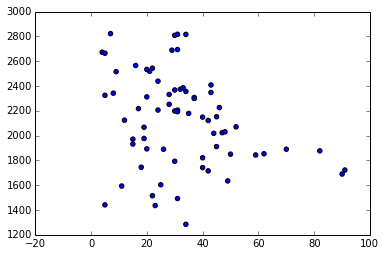

In [58]:
plt.scatter(flood_mask, evi_mask)

In [32]:
np.corrcoef(flood_mask, evi_mask)

array([[ 1.        , -0.37075568],
       [-0.37075568,  1.        ]])

In [59]:
np.array([flood_mask.sum()])

array([ 24368.], dtype=float32)

In [60]:
np.vstack([flood_sum, np.array([flood_mask.sum()])])

ValueError: all the input array dimensions except for the concatenation axis must match exactly

In [61]:
flood_sum

array([], dtype=float64)

In [74]:
j = ids[0]
flood_mask = flood_array[np.where((county_array == j) & (crop_array == 5) & (flood_array > 10))]
print flood_mask

[]


In [66]:
np.vstack([flood_sum, np.array([flood_mask.sum()])])

ValueError: all the input array dimensions except for the concatenation axis must match exactly

In [79]:
flood_array[np.where((county_array == 138) & (crop_array == 5) & (flood_array > 10))]

array([  19.,   20.,   13.,   32.,   16.,   19.,   16.,   29.,   46.,
         11.,   17.,   22.,   27.,   27.,   55.,   15.,   25.,   19.,
         17.,   13.,   56.,   21.,   20.,   52.,   73.,   12.,   54.,
         34.,   62.,   20.,   21.,   31.,   22.,   16.,   33.,   47.,
         31.,   21.,   39.,   75.,   40.,   39.,   11.,   35.,   27.,
         19.,   20.,   34.,   56.,   70.,  102.,  171.,   39.,   57.,
         57.,  184.,   13.,   56.,   55.,   33.,   66.,   35.,   61.,
         55.,   34.,   33.,   31.,   52.,   20.,   55.,   78.,   58.,
         33.,   76.,   78.,   57.,   33.,   33.,   37.,   55.,   21.,
         38.,   37.,   35.,   53.,   53.,   52.,   33.,   36.,   34.,
         33.,   59.,   37.,   34.,   34.,   31.,   54.,   34.,   36.,
         34.,   33.,   53.,   34.,   33.,   32.,   54.,   33.,   35.,
         37.,   35.,   55.,   53.,   53.,   34.,   58.,   77.,   75.,
         74.,   72.,   34.,   74.,   53.,   53.,   33.,   52.,   53.,
         36.,   55.,

In [78]:
flood_array[county_array == 5]

array([ 29.,  38.,  47., ...,  22.,  23.,  22.], dtype=float32)